# Solemne 2

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

In [7]:
wines = pd.read_csv("winequality-red.csv")

In [8]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Podemos ver que tenemos 12 columnas, una buena cantidad para trabajar.

### Tenemos etiquetas con caracteristicas fisicoquimicas del vino portugues "Vinho Verde.

### La etiqueta Quality es una columna que nos muestra un valor entero para la calidad del vino.

### Es un conjunto de datos muy limpio, no tenemos etiquetas de texto.

# Preprocessing

    Verificamos si existen valores nulos en nuestro conjunto de datos

In [9]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
wines['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### La etiqueta quality tiene 6 tipos de clasificaciones.

### Considerando esta informacion, podriamos tomar una decision y enfocar el trabajo hacia un objetivo en especifico.

### Objetivo: Con el conjunto de datos seleccionados, predecir cada una de sus clasificaciones de calidad del vino utilizando el algoritmo de agrupamiento k-means.

    - Vamos a separar nuestra etiqueta quality de nuestro conjunto de datos.
    - Si queremos predecir sin alterar nuestro modelo debemos tratar los datos.
    - Existen caracteristican con escalas de varianzas muy distintas y se podria dar el caso que mas de alguna caracteristica no tenga mayor relacion y aun asi resulte predominante para el modelo.
    - Para esto utilizaremos StandardScaler.
    
    
    - Link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [13]:
y = wines['quality']
X = wines.drop('quality', axis=1)

In [14]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [15]:
#Escalar estandar.
scaler = StandardScaler()


#Ajusto el escalar basandome en los valores de X, luego transformo X y lo almacenamos nuevamente en el como un dataframe.
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [16]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


### Ahora tenemos datos utiles escalados para tratar con estos tipos de modelos.

## Podriamos Ejecutar K-Means con un rango de valores para el numero de clusters y graficar su distorcion. Pero como ya sabemos que existen 6 tipos de clasificaciones de vinos, asignamos n_clusters = 6.

# Agrupamiento

In [17]:
# Creo el modelo
kmeans = KMeans(n_clusters=6)

#Aplico el modelo a la data
kmeans.fit(X)

KMeans(n_clusters=6)

In [18]:
# Hacemos una prediccion para cada uno y lo almacenamos en clusters
clusters = kmeans.predict(X)
clusters

array([1, 1, 1, ..., 2, 1, 2])

### Obtenemos una matriz unidimensional con la prediccion del modelo de todas las clasificaciones de clusteres

## Ya realizando la agrupacion, seria interesante visualizar esto.

### Utilizare una tecnica llamada PCA (Principal Component Analysis).
### A grandes rasgos, reduce la cantidad de variables a visualizar, creando una cantidad menor de nuevas variables que representen lo mejor posible a las variables originales.

# Visualización

In [19]:
pca = PCA(n_components=2)

X_reducido = pd.DataFrame(pca.fit_transform(X), columns=["PC1", "PC2"])
X_reducido

,PC1,PC2
0,-1.619530,0.450950
1,-0.799170,1.856553
2,-0.748479,0.882039
3,2.357673,-0.269976
4,-1.619530,0.450950
...,...,...
1594,-2.150500,0.814286
1595,-2.214496,0.893101
1596,-1.456129,0.311746
1597,-2.270518,0.979791


In [20]:
#Agregamos la columna cluster con los agrupamientos del modelo
X_reducido['cluster'] = clusters
X_reducido

,PC1,PC2,cluster
0,-1.619530,0.450950,1
1,-0.799170,1.856553,1
2,-0.748479,0.882039,1
3,2.357673,-0.269976,4
4,-1.619530,0.450950,1
...,...,...,...
1594,-2.150500,0.814286,2
1595,-2.214496,0.893101,2
1596,-1.456129,0.311746,2
1597,-2.270518,0.979791,1


## Podemos ver en este diagrama de dispersion todos los puntos de los datos pero ahora en solo dos dimensiones.

## Parece como si fuese un solo agrupamiento con algunos valores atipicos, pero veamos si K-Means ha descubierto algunas agrupaciones.

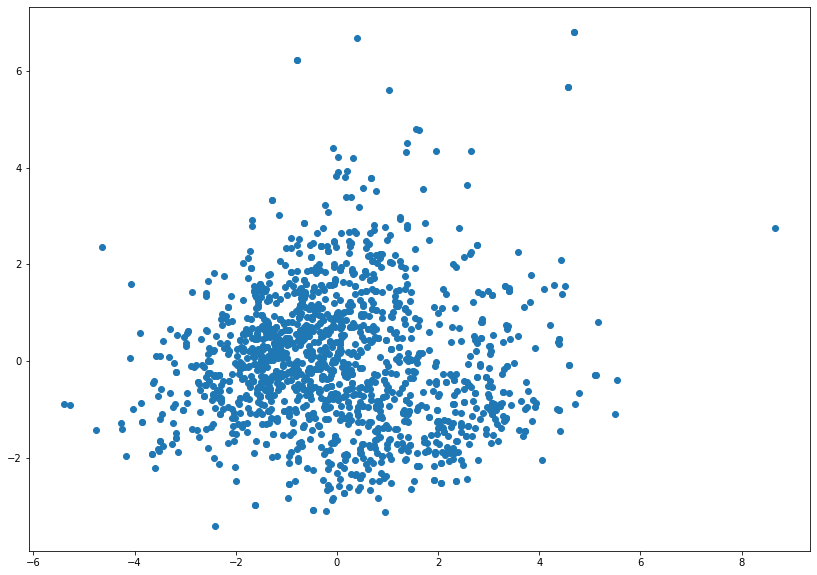

In [21]:
plt.figure(figsize=(14, 10))
plt.scatter(X_reducido['PC1'], X_reducido['PC2'])

## Los centros de cada uno de los 6 clusters que encontro el modelo siguen siendo de 11 dimensiones, asi que vamos  a reducir esto tambien.

In [22]:
kmeans.cluster_centers_

array([[ 9.54162998e-02,  2.19980305e-03,  1.18155266e+00,
        -3.89872163e-01,  5.78475973e+00, -4.95156003e-02,
         5.10329601e-01,  1.80071833e-01, -1.73579154e+00,
         3.66341219e+00, -8.69731260e-01],
       [-4.69826623e-01,  6.91268586e-01, -8.20922313e-01,
        -1.90831597e-01, -5.88951871e-02, -4.33566607e-01,
        -4.06226393e-01, -4.93284551e-02,  4.07850825e-01,
        -3.97952072e-01, -4.27155415e-01],
       [-6.93134185e-01, -4.32345634e-01, -1.52790669e-01,
        -2.57936362e-01, -4.17033244e-01,  1.14535578e-01,
        -2.45052226e-01, -1.23764983e+00,  6.37935218e-01,
         1.37909482e-01,  1.28611385e+00],
       [-8.56332101e-02, -3.46521643e-02,  4.14855742e-01,
         4.96176756e+00,  2.96387895e-01,  1.75019116e+00,
         1.69583213e+00,  1.22500051e+00, -3.25459600e-01,
        -2.37893278e-02, -3.63912996e-01],
       [ 1.33799383e+00, -6.73360431e-01,  1.12583206e+00,
         7.59583143e-02, -6.69548430e-03, -5.71834219e-01,
  

In [23]:
centroide_reducido = pca.transform(kmeans.cluster_centers_)
centroide_reducido

array([[ 3.59939563,  1.05498421],
       [-1.05636259,  0.02304879],
       [-1.32415058, -1.01838898],
       [ 1.58571538,  3.62081388],
       [ 2.09298218, -0.99767127],
       [ 0.14381295,  1.49208657]])

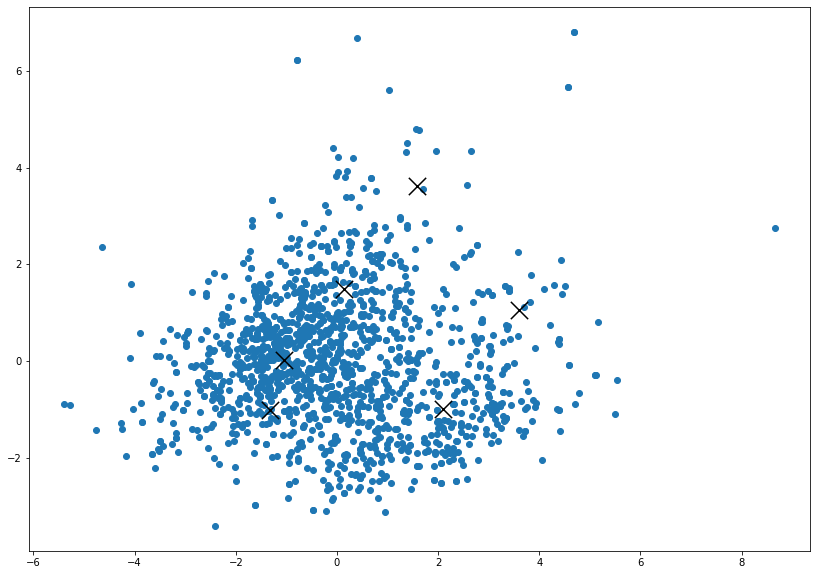

In [24]:
plt.figure(figsize=(14, 10))
plt.scatter(X_reducido['PC1'], X_reducido['PC2'])

plt.scatter(centroide_reducido[:, 0], centroide_reducido[:, 1], color='black', marker='x', s=300)

plt.show()

## Podemos observar que los centros de cada clusters ya se encuentran reducidos a 2 dimensiones. Pero todavia no podemos identificar muy bien los agrupamientos.

## Podriamos visualizar estos agrupamientos por color y de esta manera observarlos mucho mas facilmente.




#### link: https://htmlcolorcodes.com/es/nombres-de-los-colores/

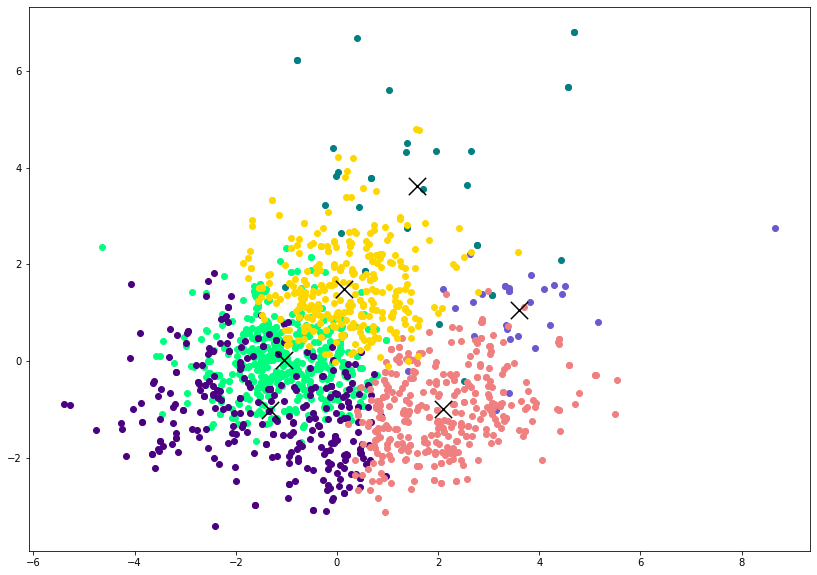

In [25]:
plt.figure(figsize=(14, 10))


plt.scatter(X_reducido[X_reducido['cluster'] == 0].loc[:, 'PC1'], X_reducido[X_reducido['cluster'] == 0].loc[:, 'PC2'], color='slateblue')
plt.scatter(X_reducido[X_reducido['cluster'] == 1].loc[:, 'PC1'], X_reducido[X_reducido['cluster'] == 1].loc[:, 'PC2'], color='springgreen')
plt.scatter(X_reducido[X_reducido['cluster'] == 2].loc[:, 'PC1'], X_reducido[X_reducido['cluster'] == 2].loc[:, 'PC2'], color='indigo')
plt.scatter(X_reducido[X_reducido['cluster'] == 3].loc[:, 'PC1'], X_reducido[X_reducido['cluster'] == 3].loc[:, 'PC2'], color='teal')
plt.scatter(X_reducido[X_reducido['cluster'] == 4].loc[:, 'PC1'], X_reducido[X_reducido['cluster'] == 4].loc[:, 'PC2'], color='lightcoral')
plt.scatter(X_reducido[X_reducido['cluster'] == 5].loc[:, 'PC1'], X_reducido[X_reducido['cluster'] == 5].loc[:, 'PC2'], color='gold')

plt.scatter(centroide_reducido[:, 0], centroide_reducido[:, 1], color='black', marker='x', s=300)

plt.show()

## Podemos ver ahora los datos agrupados por colores, al ojo humano logro identificar 6, pero no estoy realmente seguro...

## Sin duda es una forma muy interesante de visualizar los datos.


## Ahora entrenameros un modelo con nuestro set de datos con 11 dimensiones (X) previamente escalados. Vamos a intentar predecir la calidad del Vino para cada uno de los registros y en base a los resultados obtenidos, mas lo realizado previamente llegar a algun tipo de conclusion.

# Entrenamiento

In [26]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [28]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
model = MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=500)

model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=500)

In [29]:
print(f"Precision del modelo: {model.score(X_test, y_test)}")

Precision del modelo: 0.64375


## La precision del modelo luego de probarlo en varias oportunidades ronda entre los 60-69%, la verdad no es una gran precision y quizas es porque no existe una gran correlacion entre estas 11 caracteristicas y la calidad del vino.

## Esto puede ser debido a que las 11 caracteristicas de la muestra corresponden a medidas fisicoquimicas y la calidad del vino es una medida subjetiva que depende netamente del catador del vino y su evaluacion.